In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
data = pd.read_csv('..\Data\Raw\Energy_Consumption_data.csv')
data['Timestamp']= pd.to_datetime(data['Timestamp'],format='%Y-%m-%d %H:%M:%S')

In [3]:
data.head(3)

,Timestamp,Temperature,Value,Year,Month,Day,Hour,Minute,timing,week_info,Holiday
0,2016-01-02 02:15:00,5.425,32782.09614,2016,1,2,2,15,1,1,0
1,2016-01-02 02:30:00,5.350,31731.64203,2016,1,2,2,30,1,1,0
2,2016-01-02 02:45:00,5.275,31810.92158,2016,1,2,2,45,1,1,0


In [4]:
data.shape

(48096, 11)

In [5]:
data = data[-2500:]

In [6]:
data.shape

(2500, 11)

In [7]:
data['lag_tem'] = data[data.columns[1]].shift(96)
data['lag_value'] = data[data.columns[2]].shift(96)
data = data.dropna(axis = 0, how = 'any')
data.reset_index(drop = True, inplace = True)
data.head()

,Timestamp,Temperature,Value,Year,Month,Day,Hour,Minute,timing,week_info,Holiday,lag_tem,lag_value
0,2017-07-25 03:15:00,14.23750,23783.86660,2017,7,25,3,15,1,0,0,18.1625,25765.85549
1,2017-07-25 03:30:00,14.22500,27747.84437,2017,7,25,3,30,1,0,0,17.7000,23783.86660
2,2017-07-25 03:45:00,14.21250,25765.85549,2017,7,25,3,45,1,0,0,17.2375,25765.85549
3,2017-07-25 04:00:00,14.20000,27747.84437,2017,7,25,4,0,2,0,0,16.7750,23783.86660
4,2017-07-25 04:15:00,14.18125,25765.85549,2017,7,25,4,15,2,0,0,16.7625,25765.85549


In [8]:
Energy_data = data.drop(columns = {'Temperature'})

In [9]:
Energy_data.head(3)

,Timestamp,Value,Year,Month,Day,Hour,Minute,timing,week_info,Holiday,lag_tem,lag_value
0,2017-07-25 03:15:00,23783.86660,2017,7,25,3,15,1,0,0,18.1625,25765.85549
1,2017-07-25 03:30:00,27747.84437,2017,7,25,3,30,1,0,0,17.7000,23783.86660
2,2017-07-25 03:45:00,25765.85549,2017,7,25,3,45,1,0,0,17.2375,25765.85549


In [10]:
Energy_data.columns

Index(['Timestamp', 'Value', 'Year', 'Month', 'Day', 'Hour', 'Minute',
       'timing', 'week_info', 'Holiday', 'lag_tem', 'lag_value'],
      dtype='object')

In [11]:
#data normalization
columns = {'Value', 'Year', 'Month', 'Day', 'Hour', 'Minute',
       'timing', 'week_info', 'Holiday', 'lag_tem', 'lag_value'}

for col in columns:
    scaler = MinMaxScaler()
    Energy_data[col] = scaler.fit_transform(Energy_data[col].values.reshape(-1,1))

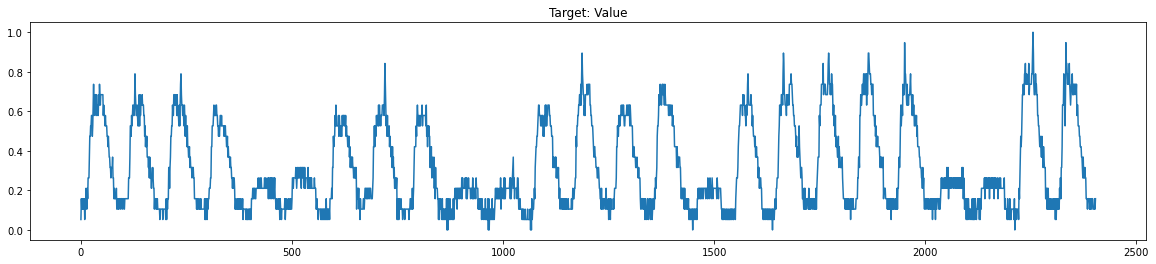

In [12]:
sns.reset_orig()
plt.figure(figsize = (20,4))
plt.title('Target: Value')
plt.plot(Energy_data['Value'])
plt.show()

In [13]:
#Energy_data.to_csv('..\Data\Processed\Energy_data.csv', index = False)